# Manually perform simulations

This notebook can be used to recompute all data that is used in Figures 3, 4, and 5. A summary of the data, as required for the actual figures is part of this repository (`data` folder). Rerunning the whole simulations is timeconsuming. Therefore, the examples below use a reduced accuracy and a coarse grid.

In [1]:
import sys
sys.path.append('..')
from simtools import Strip, pattern_ascii, create_pattern, collect_results

In [2]:
import itertools
import numpy as np

In [3]:
htop = 10e-9
hbottom = 20e-9
cell = (5e-9, 5e-9, 2.5e-9)  # paper: (2.5e-9, 2.5e-9, 2.5e-9)

To compute all data required for Figures 3, 4, and 5 set the following variable to `True`.

In [4]:
compute_all_data = False

## Energetically different configurations

This part of the notebooks recomputes a small and coarse dataset similar to the one use for Fig. 3. This dataset has been reduced to a size that should make it possible to easily recompute it (estimated time: ~10 minutes on 4 cores, but depending on available resources e.g. on Binder it may take longer).

In [5]:
lengths = np.arange(100e-9, 601e-9, 100e-9)  # paper: np.arrange(100e-9, 1401e-9, 20e-9)
lengths

array([1.e-07, 2.e-07, 3.e-07, 4.e-07, 5.e-07, 6.e-07])

In [6]:
widths = [100e-9]  # paper: np.arange(100e-9, 201e-9, 10e-9)
widths

[1e-07]

In [7]:
patterns = create_pattern(n=[1, 2, 3], method='energy-levels')  # paper: n=range(1, 9)
patterns

['i', 'ii', 'io', 'iii', 'iio', 'ioi']

Number of simulations:

In [8]:
len(lengths) * len(widths) * len(patterns)

36

In [9]:
for length, width, pattern in itertools.product(lengths, widths, patterns):
    s = Strip(length, width, htop, hbottom, initpattern=pattern, dirname='data/energy_levels', cell=cell)
    s.min_drive(fixed=True, verbose=0)
    s.min_drive(verbose=0)
    s.count_bp_and_save(minimisation='fixedfree')

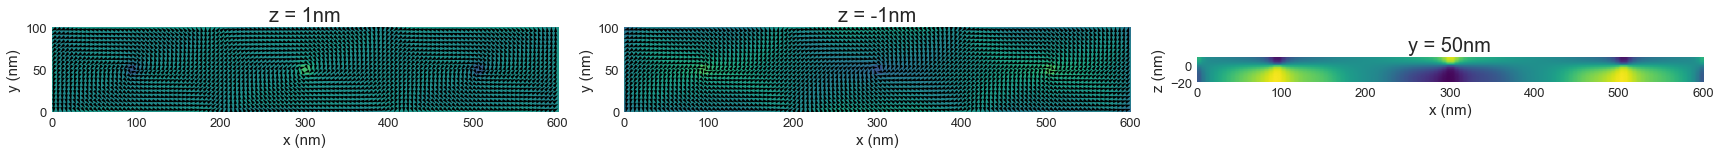

In [10]:
s.show_m()

In [11]:
collect_results('data/energy-levels.csv', glob_dir='data/energy_levels')

Searching...
Processing 36 files...


100%|█████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 285.86it/s]


Adding additional information...


100%|██████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 84.96it/s]


## All configurations with 3 Bloch points for $l=600$ nm
- in total: 8 simulations
- estimated time: ~5 minutes (on 4 cores)

In [12]:
length = 600e-9
width = 100e-9

for pattern in create_pattern(n=3, method='all'):
    print(pattern)  # to display progress
    s = Strip(length, width, htop, hbottom, initpattern=pattern, dirname='data/3_bps', cell=cell)
    s.min_drive(fixed=True, verbose=0)
    s.min_drive(verbose=0)
    s.count_bp_and_save(minimisation='fixedfree')

iii
iio
ioi
ioo
oii
oio
ooi
ooo


In [13]:
collect_results('data/3-bps.csv', glob_dir='data/3_bps')

Searching...
Processing 8 files...


100%|███████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 265.29it/s]


Adding additional information...


100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.24it/s]


## All configurations with 8 Bloch points for $l=1200$ nm
In total: 256 simulations

In [14]:
if compute_all_data:
    length = 1200e-9
    width = 100e-9

    for pattern in create_pattern(n=8, method='all'):
        s = Strip(length, width, htop, hbottom, initpattern=pattern, dirname='data/8_bps', cell=cell)
        s.min_drive(fixed=True)
        s.min_drive()
        s.count_bp_and_save(minimisation='fixedfree')

    collect_results('data/8-bps.csv', glob_dir='data/8_bps')

# Recreating the exact datasets

The cells below recompute the full datasets stored in the `data` directory of this repository. This has a very long runtime and is generally only feasible on an HPC system.

`fig4.csv` is a subset of `fig5.csv`.

## Fig3.csv

In [ ]:
if compute_all_data:
    lengths = np.arange(100e-9, 601e-9, 25e-9)
    widths = [100e-9]
    patterns = create_pattern(n=[1, 2, 3], method='energy-levels')

    for length, width, pattern in itertools.product(lengths, widths, patterns):
        s = Strip(length, width, htop, hbottom, initpattern=pattern, dirname='full_data/fig3')
        s.min_drive(fixed=True)
        s.min_drive()
        s.count_bp_and_save(minimisation='fixedfree')

    collect_results('full_data/fig3.csv', glob_dir='full_data/fig3')

## Fig4.csv

In [ ]:
if compute_all_data:
    lengths = np.arange(100e-9, 1401e-9, 20e-9)
    widths = np.arange(100e-9, 201e-9, 10e-9)
    patterns = create_pattern(n=range(1, 9), method='alternating')

    for length, width, pattern in itertools.product(lengths, widths, patterns):
        s = Strip(length, width, htop, hbottom, initpattern=pattern, dirname='full_data/fig4')
        s.min_drive(fixed=True)
        s.min_drive()
        s.count_bp_and_save(minimisation='fixedfree')

    collect_results('full_data/fig4.csv', glob_dir='full_data/fig4')

## Fig5.csv

In [ ]:
if compute_all_data:
    lengths = np.arange(100e-9, 3001e-9, 20e-9)
    widths = np.arange(100e-9, 201e-9, 10e-9)
    patterns = create_pattern(n=range(1, 9), method='alternating')

    for length, width, pattern in itertools.product(lengths, widths, patterns):
        s = Strip(length, width, htop, hbottom, initpattern=pattern, dirname='full_data/fig5')
        s.min_drive(fixed=True)
        s.min_drive()
        s.count_bp_and_save(minimisation='fixedfree')

    collect_results('full_data/fig5.csv', glob_dir='full_data/fig5')